In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Checkout the labels of our data
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [6]:
df.shape

(555719, 23)

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Convert string to categories

In [6]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
trans_date_trans_time,2020-06-21 12:14:25,2020-06-21 12:14:33,2020-06-21 12:14:53,2020-06-21 12:15:15,2020-06-21 12:15:17
cc_num,2291163933867244,3573030041201292,3598215285024754,3591919803438423,3526826139003047
merchant,fraud_Kirlin and Sons,fraud_Sporer-Keebler,"fraud_Swaniawski, Nitzsche and Welch",fraud_Haley Group,fraud_Johnston-Casper
category,personal_care,personal_care,health_fitness,misc_pos,travel
amt,2.86,29.84,41.28,60.05,3.19
first,Jeff,Joanne,Ashley,Brian,Nathan
last,Elliott,Williams,Lopez,Williams,Massey
gender,M,F,F,M,M
street,351 Darlene Green,3638 Marsh Union,9333 Valentine Point,32941 Krystal Mill Apt. 552,5783 Evan Roads Apt. 465


In [7]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

trans_date_trans_time
merchant
category
first
last
gender
street
city
state
job
dob
trans_num


In [8]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             555719 non-null  int64   
 1   trans_date_trans_time  555719 non-null  category
 2   cc_num                 555719 non-null  int64   
 3   merchant               555719 non-null  category
 4   category               555719 non-null  category
 5   amt                    555719 non-null  float64 
 6   first                  555719 non-null  category
 7   last                   555719 non-null  category
 8   gender                 555719 non-null  category
 9   street                 555719 non-null  category
 10  city                   555719 non-null  category
 11  state                  555719 non-null  category
 12  zip                    555719 non-null  int64   
 13  lat                    555719 non-null  float64 
 14  long                

In [10]:
df.state.cat.categories

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object')

In [11]:
# Check missing data
df.isnull().sum()/len(df)

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [14]:
columns_to_delete=["trans_date_trans_time","merchant", "category","first","last","gender","street","city","state"]
df.drop(columns_to_delete,inplace=True,axis=1)
df

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,43.77,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,4079773899158,7.99,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [17]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
cc_num,2291163933867244,3573030041201292,3598215285024754,3591919803438423,3526826139003047
amt,2.86,29.84,41.28,60.05,3.19
zip,29209,84002,11710,32780,49632
lat,33.9659,40.3207,40.6729,28.5697,44.2529
long,-80.9355,-110.436,-73.5365,-80.8191,-85.017
city_pop,333497,302,34496,54767,1126
job,Mechanical engineer,"Sales professional, IT","Librarian, public",Set designer,Furniture designer
dob,1968-03-19,1990-01-17,1970-10-21,1987-07-25,1955-07-06
trans_num,2da90c7d74bd46a0caf3777415b3ebd3,324cc204407e99f51b0d6ca0055005e7,c81755dbbbea9d5c77f094348a7579be,2159175b9efe66dc301f149d3d5abf8c,57ff021bd3f328f8738bb535c302a31b


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  555719 non-null  int64   
 1   cc_num      555719 non-null  int64   
 2   amt         555719 non-null  float64 
 3   zip         555719 non-null  int64   
 4   lat         555719 non-null  float64 
 5   long        555719 non-null  float64 
 6   city_pop    555719 non-null  int64   
 7   job         555719 non-null  category
 8   dob         555719 non-null  category
 9   trans_num   555719 non-null  category
 10  unix_time   555719 non-null  int64   
 11  merch_lat   555719 non-null  float64 
 12  merch_long  555719 non-null  float64 
 13  is_fraud    555719 non-null  int64   
dtypes: category(3), float64(5), int64(6)
memory usage: 71.3 MB


In [21]:
columns_to_delete=["amt","lat", "long","merch_lat","merch_long"]
df.drop(columns_to_delete,inplace=True,axis=1)
df

,Unnamed: 0,cc_num,zip,city_pop,job,dob,trans_num,unix_time,is_fraud
0,0,2291163933867244,29209,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,1,3573030041201292,84002,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,2,3598215285024754,11710,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,3,3591919803438423,32780,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,4,3526826139003047,49632,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,0
...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,63453,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,0
555715,555715,3556613125071656,77566,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,0
555716,555716,6011724471098086,99323,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,0
555717,555717,4079773899158,83643,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  555719 non-null  int64   
 1   cc_num      555719 non-null  int64   
 2   zip         555719 non-null  int64   
 3   city_pop    555719 non-null  int64   
 4   job         555719 non-null  category
 5   dob         555719 non-null  category
 6   trans_num   555719 non-null  category
 7   unix_time   555719 non-null  int64   
 8   is_fraud    555719 non-null  int64   
dtypes: category(3), int64(6)
memory usage: 50.1 MB


In [30]:
columns_to_delete=["zip", "city_pop","job","dob","unix_time","trans_num"]
df.drop(columns_to_delete,inplace=True,axis=1)
df

,Unnamed: 0,cc_num,is_fraud
0,0,2291163933867244,0
1,1,3573030041201292,0
2,2,3598215285024754,0
3,3,3591919803438423,0
4,4,3526826139003047,0
...,...,...,...
555714,555714,30560609640617,0
555715,555715,3556613125071656,0
555716,555716,6011724471098086,0
555717,555717,4079773899158,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  555719 non-null  int64
 1   cc_num      555719 non-null  int64
 2   is_fraud    555719 non-null  int64
dtypes: int64(3)
memory usage: 12.7 MB


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_fraud', axis=1), df['is_fraud'], test_size=0.3, random_state=42)

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred) * 100
print('Logistic Regression Accuracy:',lr_acc)

Logistic Regression Accuracy: 99.6161136303654


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, lr_pred)*100
recall_data=recall_score(y_test, lr_pred)
f1_score_data=f1_score(y_test, lr_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
precision_data

100.0

In [45]:
recall_data

0.0

In [47]:
# Train and evaluate Decision Tree Classifier model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)* 100

print('Decision Tree Classifier accuracy:', dtc_acc)

Decision Tree Classifier accuracy: 99.80745699273015


In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, dtc_pred)* 100
recall_data=recall_score(y_test, dtc_pred)* 100
f1_score_data=f1_score(y_test, dtc_pred)* 100

In [49]:
precision_data

72.88378766140603

In [50]:
recall_data

79.375

In [51]:
f1_score_data

75.99102468212416

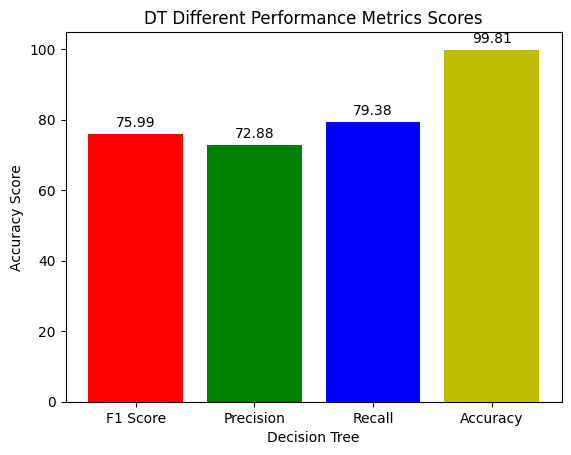

In [52]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, dtc_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Decision Tree')
ax.set_ylabel('Accuracy Score')
ax.set_title('DT Different Performance Metrics Scores')

# Show the plot
plt.show()


In [53]:
# Train and evaluate Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)* 100
print('Random Forest Classifier accuracy:', rfc_acc)

Random Forest Classifier accuracy: 99.92022361381031


In [54]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, rfc_pred)* 100
recall_data=recall_score(y_test, rfc_pred)* 100
f1_score_data=f1_score(y_test, rfc_pred)* 100

precision_data





89.01734104046244

In [55]:
recall_data

84.21875

In [56]:
f1_score_data

89.01734104046244

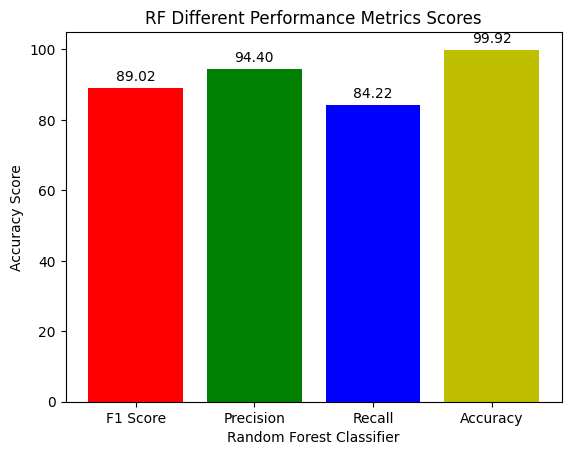

In [57]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, rfc_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Random Forest Classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('RF Different Performance Metrics Scores')

# Show the plot
plt.show()


In [58]:
# Train and evaluate Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)* 100
print('Support Vector Machine accuracy:', svm_acc)

Support Vector Machine accuracy: 99.6161136303654


In [59]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, svm_pred)* 100
recall_data=recall_score(y_test, svm_pred)* 100
f1_score_data=f1_score(y_test, svm_pred)* 100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
precision_data

0.0

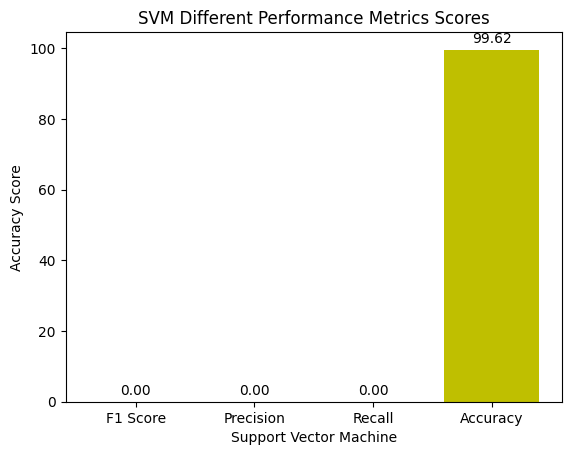

In [61]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, svm_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Support Vector Machine')
ax.set_ylabel('Accuracy Score')
ax.set_title('SVM Different Performance Metrics Scores')

# Show the plot
plt.show()

In [62]:
# Train and evaluate Multi-Layer Perceptron model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)* 100
print('Multi-Layer Perceptron accuracy:', mlp_acc)

Multi-Layer Perceptron accuracy: 99.6161136303654


In [63]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, mlp_pred)* 100
recall_data=recall_score(y_test, mlp_pred)* 100
f1_score_data=f1_score(y_test, mlp_pred)* 100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


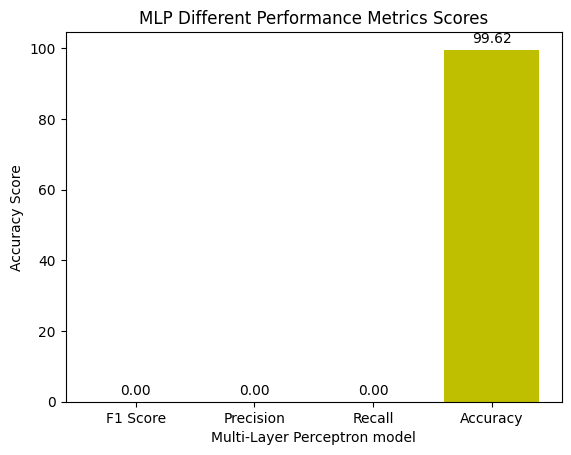

In [64]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, mlp_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Multi-Layer Perceptron model')
ax.set_ylabel('Accuracy Score')
ax.set_title('MLP Different Performance Metrics Scores')

# Show the plot
plt.show()

In [65]:
# Train and evaluate KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)* 100
print('KNN Perceptron accuracy:', knn_acc)

KNN Perceptron accuracy: 99.88363444420452


In [66]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, knn_pred)* 100
recall_data=recall_score(y_test, knn_pred)* 100
f1_score_data=f1_score(y_test, knn_pred)* 100

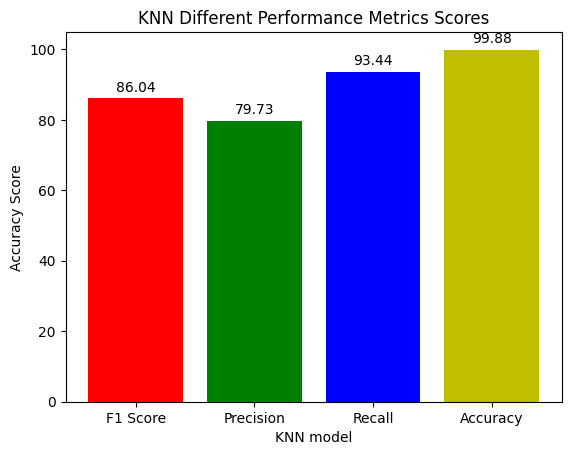

In [67]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, knn_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('KNN model')
ax.set_ylabel('Accuracy Score')
ax.set_title('KNN Different Performance Metrics Scores')

# Show the plot
plt.show()


In [68]:
# Train and evaluate XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)* 100
print('XGB Perceptron accuracy:', xgb_acc)

XGB Perceptron accuracy: 99.64610475299311


In [69]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, xgb_pred)* 100
recall_data=recall_score(y_test, xgb_pred)* 100
f1_score_data=f1_score(y_test, xgb_pred)* 100

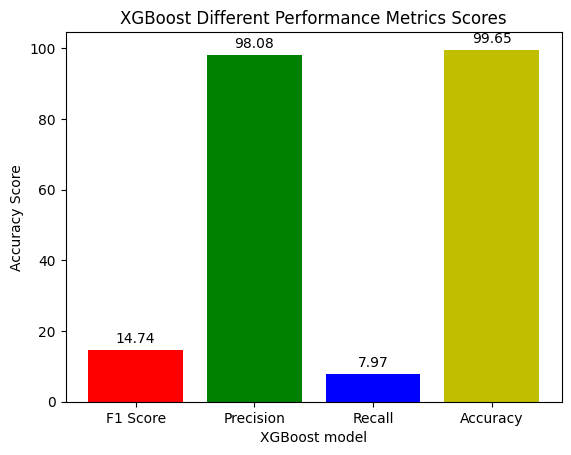

In [70]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, xgb_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('XGBoost model')
ax.set_ylabel('Accuracy Score')
ax.set_title('XGBoost Different Performance Metrics Scores')

# Show the plot
plt.show()


In [71]:
# Train the Naive Bayes classifier
NBC = GaussianNB()
NBC.fit(X_train, y_train)

# Make predictions on the test set
NBC_pred = NBC.predict(X_test)

# Calculate the accuracy of the model
NBC_acc = accuracy_score(y_test, NBC_pred)* 100
print("Naive Bayes classifier Accuracy:", NBC_acc)

Naive Bayes classifier Accuracy: 99.6161136303654


In [72]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, NBC_pred)* 100
recall_data=recall_score(y_test, NBC_pred)* 100
f1_score_data=f1_score(y_test, NBC_pred)* 100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


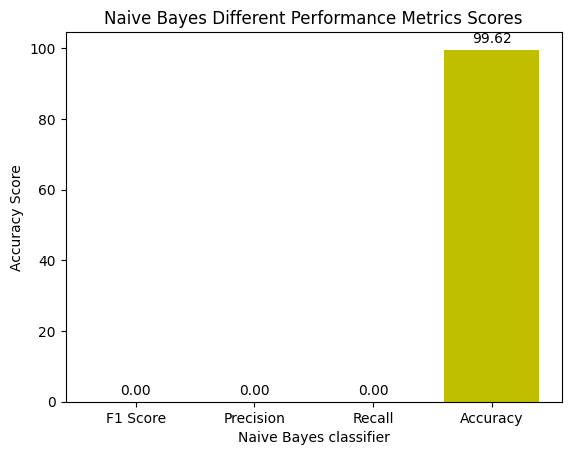

In [73]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, NBC_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Naive Bayes classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('Naive Bayes Different Performance Metrics Scores')

# Show the plot
plt.show()
